In [140]:
import numpy as np
import pandas as pd

# Function to generate channel gains
def generate_channel_gains(num_users, num_batches):
    # Generate random channel gains (squared magnitude)
    channel_gains = np.random.rand(num_users, num_batches) ** 2
    return channel_gains

# Function to scale channel gains using hyperbolic tangent
def scale_channel_gains(channel_gains):
    # Scale channel gains to follow a hyperbolic tangent distribution
    scaled_gains = np.tanh(channel_gains)
    return scaled_gains

# Parameters
num_users = 20  # Number of users (N_U)
num_batches = 10  # Number of batches (N_batch)
num_solutions = 10  # Number of solutions (N_s)

# Generate channel gains for all users in all batches
channel_gains = generate_channel_gains(num_users, num_batches)

# Scale channel gains using hyperbolic tangent
scaled_gains = scale_channel_gains(channel_gains)
# print("Scaled Gains (QNN Input Data):\n", scaled_gains)

# Generate user pairings (solutions) and reference outputs
solutions = []
reference_outputs = []

for i in range(1, num_solutions + 1):
    # Simulate user pairing (for simplicity, using the index as a placeholder)
    solutions.append(i)
    # Calculate reference output for the solution
    o_ref = (num_solutions - (i - 1)) / num_solutions
    reference_outputs.append(o_ref)

# Create the training dataset
training_data = []

for batch in range(num_batches):
    row = list(scaled_gains[:, batch]) + [reference_outputs[batch % num_solutions]]
    training_data.append(row)

# Convert to DataFrame for better readability
column_names = [f'|h{i}|^2' for i in range(1, num_users + 1)] + ['o_ref']
training_df = pd.DataFrame(training_data, columns=column_names)

print("\nTraining DataFrame:\n")
training_df


Training DataFrame:



,|h1|^2,|h2|^2,|h3|^2,|h4|^2,|h5|^2,|h6|^2,|h7|^2,|h8|^2,|h9|^2,|h10|^2,...,|h12|^2,|h13|^2,|h14|^2,|h15|^2,|h16|^2,|h17|^2,|h18|^2,|h19|^2,|h20|^2,o_ref
0,0.106492,0.093248,0.130648,0.157020,0.117526,0.006693,0.051354,0.502450,0.017910,0.596263,...,0.632116,0.737218,0.554746,0.006254,5.819319e-07,0.608339,0.059169,0.629867,0.054703,1.0
1,0.069304,0.757086,0.016766,0.004665,0.171759,0.050449,0.049143,0.478866,0.064247,0.512170,...,0.397452,0.240949,0.333045,0.627094,7.340664e-01,0.077169,0.627598,0.010332,0.376908,0.9
2,0.003311,0.712791,0.214174,0.107318,0.724129,0.058247,0.711583,0.113907,0.453987,0.087141,...,0.147752,0.040628,0.164629,0.031714,3.235346e-01,0.091745,0.156871,0.590651,0.580957,0.8
3,0.392752,0.285036,0.465550,0.715344,0.035602,0.242293,0.546370,0.060608,0.422388,0.039050,...,0.010848,0.171861,0.106401,0.475683,7.166192e-01,0.003462,0.480195,0.001246,0.250046,0.7
4,0.060524,0.682250,0.013496,0.038552,0.205937,0.156222,0.736463,0.003868,0.055044,0.072370,...,0.018168,0.426108,0.020751,0.511264,8.806296e-03,0.115100,0.730730,0.404508,0.109191,0.6
5,0.431791,0.012183,0.262947,0.006455,0.187879,0.187374,0.374715,0.001075,0.090103,0.546888,...,0.146926,0.528650,0.629846,0.705697,3.354986e-02,0.271744,0.001470,0.027752,0.725611,0.5
6,0.735193,0.402370,0.509088,0.041054,0.326127,0.637249,0.110408,0.422122,0.276943,0.579850,...,0.097697,0.063636,0.093472,0.726845,2.381168e-01,0.205601,0.127005,0.001434,0.227902,0.4
7,0.409260,0.075837,0.181728,0.367370,0.004282,0.571467,0.052215,0.155833,0.129637,0.745916,...,0.754279,0.251587,0.022838,0.656112,4.585179e-01,0.009498,0.499611,0.205489,0.737455,0.3
8,0.477493,0.286355,0.571156,0.248944,0.590468,0.558561,0.173976,0.521633,0.536817,0.692739,...,0.720864,0.434908,0.694748,0.183268,3.331187e-01,0.104460,0.273229,0.481927,0.085752,0.2
9,0.483642,0.674824,0.375939,0.294960,0.630502,0.300027,0.179180,0.024915,0.005614,0.176079,...,0.148229,0.032809,0.014187,0.756833,5.957757e-01,0.673193,0.624207,0.100787,0.100301,0.1


In [168]:
data = training_df.iloc[:,[i for i in range(0,20)]].values
target_value = training_df.iloc[:, 20].values

Dict = {'data' : data, 'target_value' : target_value}

Features = Dict['data']

Target = Dict['target_value']
Features.shape

(10, 20)

In [2]:
!pip install torch torch-geometric

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d3/1d/a257913c89572de61316461db91867f87519146e58132cdeace3d9ffbe1f/torch-2.3.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.3.1-cp311-cp311-win_amd64.whl.metadata (26 kB)
  Obtaining dependency information for torch-geometric from https://files.pythonhosted.org/packages/97/f0/66ad3a5263aa16efb534aaf4e7da23ffc28c84efbbd720b0c5ec174f6242/torch_geometric-2.5.3-py3-none-any.whl.metadata
  Using cached torch_geometric-2.5.3-py3-none-any.whl.metadata (64 kB)
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dependency information for mkl<=2021.4.0,>=2021.1.1 from https://files.pythonhosted.org/packages/fe/1c/5f6dbf18e8b73e0a5472466

ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [169]:
import torch
import torch.nn as nn
import torch.optim as optim

class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size // 2),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(hidden_size // 2, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Example: Define an autoencoder with 2 input features and a hidden layer with 10 units
input_size = 20
hidden_size = 10
model = Autoencoder(input_size, hidden_size)


In [170]:
import numpy as np
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
num_samples = 1000
alpha_range = 2.0  # Range for the alpha parameter in coherent states
dataset = np.random.uniform(-alpha_range, alpha_range, (num_samples, 2))

# Normalize the dataset
dataset = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

# Convert to PyTorch tensors
X = torch.tensor(Features, dtype=torch.float32)

# Split into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


Training complete!


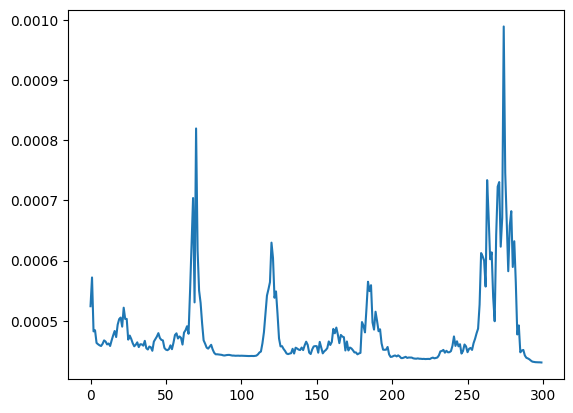

In [182]:
# Hyperparameters
num_epochs = 300
batch_size = 1
learning_rate = 0.001

# DataLoader
train_data = torch.utils.data.TensorDataset(X_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
List = []
# Training loop
for epoch in range(num_epochs):

    model.train()
    epoch_loss = 0
    for inputs in train_loader:
        inputs = inputs[0]  # Unpack the tensor
        # Forward pass
        encoded, decoded = model(inputs)
        loss = criterion(decoded, inputs)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    #print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss/len(train_loader)}")
    List.append(epoch_loss/len(train_loader))
plt.plot([epoch for epoch in range(num_epochs)], List)
print("Training complete!")
plt.show()

In [184]:
import numpy as np
import pandas as pd

def generate_dataset(N_user, N_batch, N_s):
    # Step 1: Generate random channel gains for each user in each group
    channel_gains = np.random.rand(N_batch, N_user)

    # Step 2: Scale channel gains to follow a hyperbolic tangent distribution
    channel_gains = np.tanh(channel_gains)

    # Step 3: Generate output references based on the solution index
    output_references = np.array([(N_s - (i - 1)) / N_s for i in range(1, N_batch + 1)])

    # Step 4: Combine channel gains and output references into a structured dataset
    dataset = np.hstack((channel_gains, output_references.reshape(-1, 1)))

    # Step 5: Create a Pandas DataFrame for better data manipulation
    column_names = [f'channel_gain_{i+1}' for i in range(N_user)] + ['output_reference']
    df = pd.DataFrame(dataset, columns=column_names)

    return df

# Parameters
N_user = 10  # Number of NOMA users
N_batch = 1000  # Number of batches/samples
N_s = 20  # Number of solutions

# Generate the dataset
df = generate_dataset(N_user, N_batch, N_s)

# Display the first few rows of the dataset
df.head()


,channel_gain_1,channel_gain_2,channel_gain_3,channel_gain_4,channel_gain_5,channel_gain_6,channel_gain_7,channel_gain_8,channel_gain_9,channel_gain_10,output_reference
0,0.590097,0.339550,0.710868,0.273488,0.384184,0.599220,0.530221,0.715301,0.705410,0.693142,1.00
1,0.404670,0.689152,0.647111,0.179725,0.285448,0.223710,0.294658,0.681882,0.660216,0.360555,0.95
2,0.478378,0.151222,0.438341,0.736825,0.583274,0.152363,0.710399,0.043348,0.734524,0.682736,0.90
3,0.666885,0.520711,0.055496,0.198818,0.038734,0.644028,0.270632,0.371695,0.664593,0.585572,0.85
4,0.219574,0.154512,0.688898,0.113238,0.272469,0.329875,0.327377,0.302743,0.421806,0.006090,0.80


In [185]:
import qiskit
from qiskit import Aer, transpile
from qiskit.circuit import QuantumCircuit, Parameter
import numpy as np

# Create a parameterized quantum circuit with more sophistication
def create_complex_quantum_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits)
    params = [Parameter(f'θ{i}') for i in range(num_qubits * 3)]
    for i in range(num_qubits):
        qc.rx(params[i], i)
        qc.ry(params[num_qubits + i], i)
        qc.rz(params[2 * num_qubits + i], i)
    for i in range(num_qubits - 1):
        qc.cz(i, i + 1)
    qc.cz(num_qubits - 1, 0)  # Add an additional CZ gate for more entanglement
    return qc, params

# Function to run the quantum circuit and get the expectation value
def run_complex_quantum_circuit(qc, params, parameter_values):
    backend = Aer.get_backend('qasm_simulator')
    parameter_binds = {params[i]: parameter_values[i] for i in range(len(params))}
    qc_param = qc.assign_parameters(parameter_binds)
    transpiled_qc = transpile(qc_param, backend)
    result = backend.run(transpiled_qc, shots=1024).result()
    counts = result.get_counts()
    exp_value = (counts.get('00', 0) - counts.get('11', 0) + counts.get('01', 0) - counts.get('10', 0)) / 1024
    return torch.tensor([exp_value], dtype=torch.float32)


In [186]:
class QuantumGNN(nn.Module):
    def __init__(self, in_channels, out_channels, num_qubits):
        super(QuantumGNN, self).__init__()
        self.classical_gnn = GCNConv(in_channels, out_channels)
        self.num_qubits = num_qubits
        self.q_parameters = nn.Parameter(torch.rand(num_qubits * 3))
        self.qc, self.q_params = create_complex_quantum_circuit(num_qubits)

    def forward(self, x, edge_index):
        x = self.classical_gnn(x, edge_index)
        x = torch.relu(x)  # Apply non-linearity
        quantum_features = []
        for i in range(x.size(0)):
            param_values = self.q_parameters.detach().numpy()  # Ensure parameter dimensions match
            exp_value = run_complex_quantum_circuit(self.qc, self.q_params, param_values)
            quantum_features.append(exp_value)
        quantum_features = torch.stack(quantum_features)
        return quantum_features


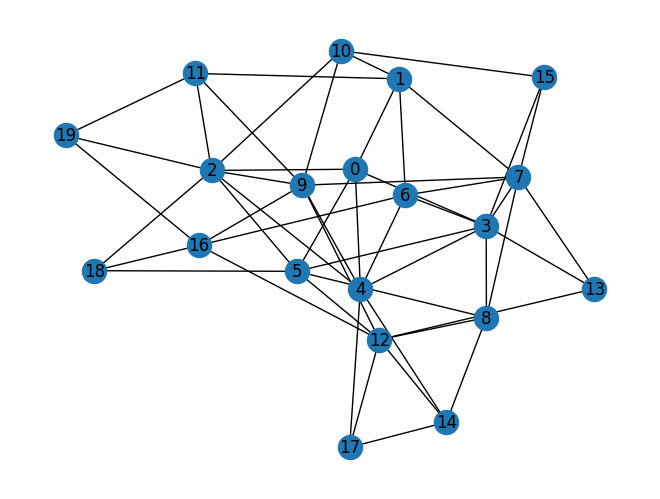

In [187]:
# Generate a more complex synthetic graph data
def create_complex_graph(num_users):
    G = nx.barabasi_albert_graph(num_users, 3)  # Use a Barabási-Albert model for realistic connectivity
    edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()
    x = torch.rand((num_users, 3), dtype=torch.float32)  # Random node features
    y = torch.rand(num_users, dtype=torch.float32)  # Random target values
    return Data(x=x, edge_index=edge_index), y

data, y = create_complex_graph(20)

# Visualize the graph
nx.draw(nx.barabasi_albert_graph(20, 3), with_labels=True)
plt.show()


In [188]:
# Initialize the model, loss function, and optimizer
model = QuantumGNN(in_channels=3, out_channels=1, num_qubits=4)
loss_fn = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.01)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = loss_fn(output.squeeze(), y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss = {loss.item()}")

# Test the model
model.eval()
with torch.no_grad():
    test_output = model(data.x, data.edge_index)
    print(f"Test output: {test_output.squeeze().numpy()}")


ERROR:stevedore.extension:Could not load 'default': cannot import name 'ElidePermutations' from 'qiskit.transpiler.passes' (/usr/local/lib/python3.10/dist-packages/qiskit/transpiler/passes/__init__.py)
ERROR:stevedore.extension:Could not load 'default': cannot import name 'ElidePermutations' from 'qiskit.transpiler.passes' (/usr/local/lib/python3.10/dist-packages/qiskit/transpiler/passes/__init__.py)
ERROR:stevedore.extension:Could not load 'dense': cannot import name 'ElidePermutations' from 'qiskit.transpiler.passes' (/usr/local/lib/python3.10/dist-packages/qiskit/transpiler/passes/__init__.py)
ERROR:stevedore.extension:Could not load 'noise_adaptive': cannot import name 'ElidePermutations' from 'qiskit.transpiler.passes' (/usr/local/lib/python3.10/dist-packages/qiskit/transpiler/passes/__init__.py)
ERROR:stevedore.extension:Could not load 'sabre': cannot import name 'ElidePermutations' from 'qiskit.transpiler.passes' (/usr/local/lib/python3.10/dist-packages/qiskit/transpiler/passes/

TranspilerError: 'Invalid plugin name sabre for stage routing'

# Creating QGNN class using Pennylane for testing

In [189]:
import pennylane as qml
from pennylane import numpy as np
import torch

# Create a quantum circuit
def create_quantum_circuit(n_qubits):
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev, interface='torch')
    def quantum_circuit(weights):
        for i in range(n_qubits):
            qml.RX(weights[i, 0], wires=i)
            qml.RY(weights[i, 1], wires=i)
            qml.RZ(weights[i, 2], wires=i)
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
        qml.CNOT(wires=[n_qubits - 1, 0])
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    return quantum_circuit


In [190]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class QuantumGNN(nn.Module):
    def __init__(self, in_channels, out_channels, num_qubits):
        super(QuantumGNN, self).__init__()
        self.classical_gnn = GCNConv(in_channels, out_channels)
        self.num_qubits = num_qubits
        self.qc_weights = nn.Parameter(torch.rand((num_qubits, 3)))
        self.quantum_circuit = create_quantum_circuit(num_qubits)
        self.fc = nn.Linear(4, 1)  # Linear layer to map from 4 outputs to 1 scalar

    def forward(self, x, edge_index):
        x = self.classical_gnn(x, edge_index)
        x = F.relu(x)  # Apply non-linearity
        quantum_features = []
        for i in range(x.size(0)):
            exp_values = self.quantum_circuit(self.qc_weights)
            exp_values_tensor = torch.tensor(exp_values, dtype=torch.float32)
            quantum_features.append(exp_values_tensor)
        quantum_features = torch.stack(quantum_features)
        output = self.fc(quantum_features)  # Apply linear layer to reduce to scalar
        return output.squeeze()  # Squeeze to match shape (20,)


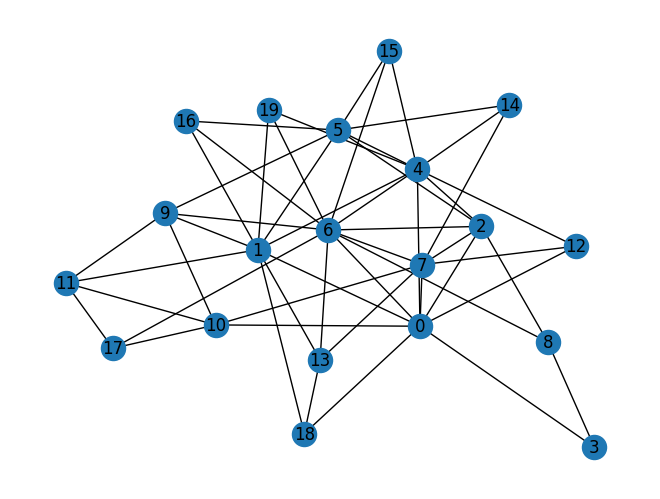

In [191]:
import networkx as nx
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt

# Generate a more complex synthetic graph data
def create_complex_graph(num_users):
    G = nx.barabasi_albert_graph(num_users, 3)  # Use a Barabási-Albert model for realistic connectivity
    edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()
    x = torch.rand((num_users, 3), dtype=torch.float32)  # Random node features
    y = torch.rand((num_users, 1), dtype=torch.float32)  # Random target values (scalar for each node)
    return Data(x=x, edge_index=edge_index), y

data, y = create_complex_graph(20)

# Visualize the graph
nx.draw(nx.barabasi_albert_graph(20, 3), with_labels=True)
plt.show()


In [192]:
from torch.optim import Adam

# Initialize the model, loss function, and optimizer
model = QuantumGNN(in_channels=3, out_channels=1, num_qubits=4)
loss_fn = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.01)

# Training loop
n_epochs = 100
loss_list = []
acc_list = []
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = loss_fn(output, y.squeeze())  # Adjusted to match shape
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())


    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss = {loss.item()}")

# Test the model
model.eval()
with torch.no_grad():
    test_output = model(data.x, data.edge_index)
    print(f"Test output: {test_output.numpy()}")

print(loss_list)



Epoch 0: loss = 0.9519109725952148
Epoch 10: loss = 0.622303307056427
Epoch 20: loss = 0.37945759296417236
Epoch 30: loss = 0.22029247879981995
Epoch 40: loss = 0.12988528609275818
Epoch 50: loss = 0.08687721937894821
Epoch 60: loss = 0.07062859833240509
Epoch 70: loss = 0.0662495344877243
Epoch 80: loss = 0.06566532701253891
Epoch 90: loss = 0.06573990732431412
Test output: [0.600894 0.600894 0.600894 0.600894 0.600894 0.600894 0.600894 0.600894
 0.600894 0.600894 0.600894 0.600894 0.600894 0.600894 0.600894 0.600894
 0.600894 0.600894 0.600894 0.600894]
[0.9519109725952148, 0.9152258038520813, 0.8793374300003052, 0.8442594408988953, 0.8100038766860962, 0.7765821218490601, 0.7440046072006226, 0.7122804522514343, 0.6814178228378296, 0.6514235734939575, 0.622303307056427, 0.5940611958503723, 0.5667005777359009, 0.5402230024337769, 0.5146286487579346, 0.4899166524410248, 0.4660845398902893, 0.44312840700149536, 0.42104315757751465, 0.3998221158981323, 0.37945759296417236, 0.3599401414394

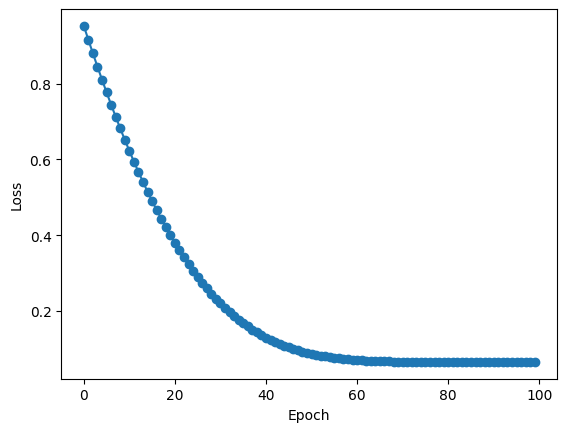

In [193]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(0, 100)], loss_list, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# ***Now lets use the dataset to see if GNN and QGNN can be implemented ***

In [194]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to generate channel gains
def generate_channel_gains(num_users, num_batches):
    # Generate random channel gains (squared magnitude)
    channel_gains = np.random.rand(num_users, num_batches) ** 2
    return channel_gains

# Function to scale channel gains using hyperbolic tangent
def scale_channel_gains(channel_gains):
    # Scale channel gains to follow a hyperbolic tangent distribution
    scaled_gains = np.tanh(channel_gains)
    return scaled_gains

# Parameters
num_users = 4  # Number of users (N_U)
num_batches = 50  # Number of batches (N_batch)
num_solutions = 50  # Number of solutions (N_s)

# Generate channel gains for all users in all batches
channel_gains = generate_channel_gains(num_users, num_batches)

# Scale channel gains using hyperbolic tangent
scaled_gains = scale_channel_gains(channel_gains)

# Generate user pairings (solutions) and reference outputs
solutions = []
reference_outputs = []

for i in range(1, num_solutions + 1):
    # Simulate user pairing (for simplicity, using the index as a placeholder)
    solutions.append(i)
    # Calculate reference output for the solution
    o_ref = (num_solutions - (i - 1)) / num_solutions
    reference_outputs.append(o_ref)

# Create the training dataset
training_data = []

for batch in range(num_batches):
    row = list(scaled_gains[:, batch]) + [reference_outputs[batch % num_solutions]]
    training_data.append(row)

# Convert to DataFrame for better readability (optional)
column_names = [f'|h{i+1}|^2' for i in range(num_users)] + ['o_ref']
training_df = pd.DataFrame(training_data, columns=column_names)
training_df.head()


,|h1|^2,|h2|^2,|h3|^2,|h4|^2,o_ref
0,0.329297,0.736641,0.675357,0.368602,1.00
1,0.681894,0.089660,0.032346,0.304403,0.98
2,0.749411,0.542928,0.231180,0.226615,0.96
3,0.376042,0.543359,0.610940,0.046052,0.94
4,0.074678,0.758096,0.122769,0.416219,0.92


In [195]:
# Convert dataset to PyTorch tensors
X = torch.tensor(training_df.iloc[:, :-1].values, dtype=torch.float32)
y = torch.tensor(training_df['o_ref'].values, dtype=torch.float32)



In [196]:
num_nodes = len(features)
edge_index = torch.tensor([(i, j) for i in range(num_nodes) for j in range(num_nodes) if i != j], dtype=torch.long).t().contiguous()

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)
data

Data(x=[50, 4], edge_index=[2, 2450], y=[50])

In [197]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return x

from torch.utils.data import DataLoader

# Convert dataset to a list of Data objects (if you have multiple graphs)
dataset = [data]

# Create DataLoader
batch_size = 5
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = GNN(input_dim=x.shape[1], hidden_dim=5, output_dim=1)  # Adjust output_dim as per your task
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

def train(model, train_loader, optimizer, loss_fn, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index)
            loss = loss_fn(out, data.y.view(-1, 1))  # Assuming target is scalar (regression task)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * data.num_graphs
        epoch_loss /= len(train_loader.dataset)
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")

# Example usage
num_epochs = 10
train(model, train_loader, optimizer, loss_fn, num_epochs)



TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'torch_geometric.data.data.Data'>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, Batch
from torch.utils.data import DataLoader, Subset

# Example data (replace with your actual dataset)
features = [
    [1.35861038e-01, 4.33190739e-01, 7.23854864e-01, 6.42867499e-01],
    [1.91416628e-01, 1.48580434e-01, 6.47027568e-01, 1.01263220e-03],
    [2.45159046e-02, 2.96262195e-01, 6.98300156e-01, 4.68653316e-01],
    [2.33411211e-01, 2.29922155e-02, 6.17154253e-01, 1.43750042e-01],
    [8.65225758e-03, 8.41720551e-03, 3.08829186e-01, 6.25104117e-01],
    [4.40873582e-02, 2.64421487e-02, 1.08695066e-02, 4.57901550e-02],
    [3.19866774e-01, 5.10297757e-01, 9.29257765e-02, 5.87295451e-01],
    [7.41897341e-01, 1.31248683e-01, 3.12081251e-01, 2.50288137e-01],
    [4.09967646e-01, 1.50511004e-01, 4.50170822e-01, 1.05786690e-01],
    [3.86397857e-01, 6.25510210e-02, 3.46820337e-01, 7.14295627e-01],
    [2.66177400e-01, 3.37566163e-02, 1.20424306e-01, 2.39210475e-01],
    [1.54736225e-01, 6.90052021e-02, 9.35892197e-03, 5.34491420e-02],
    [6.64768663e-02, 1.62425087e-01, 1.55037190e-01, 5.79719592e-01],
    [4.69672779e-01, 6.14861898e-01, 1.98803658e-01, 3.16083324e-01],
    [2.45746616e-02, 4.20866923e-01, 3.67888154e-01, 7.13204372e-01],
    [7.47500791e-03, 4.19251475e-01, 1.65165851e-01, 3.23104868e-01],
    [7.08260216e-01, 2.51658375e-01, 3.47291428e-01, 1.44125377e-01],
    [1.09899477e-01, 7.43669797e-01, 5.94164336e-01, 5.44618243e-03],
    [4.30978384e-01, 4.14356521e-01, 8.73689958e-02, 6.85356162e-01],
    [5.49875014e-01, 6.78690303e-01, 4.45855492e-01, 6.23977344e-02],
    [1.60029258e-03, 1.67751263e-01, 1.47890415e-03, 3.44112058e-02],
    [3.79214904e-01, 1.36798218e-01, 7.50136150e-01, 4.75124466e-01],
    [5.38834077e-01, 2.31292394e-03, 7.21795636e-02, 2.64044006e-01],
    [4.35380841e-02, 1.48323324e-01, 4.34478324e-01, 1.45301662e-04],
    [3.79092620e-01, 2.83889346e-01, 1.49971282e-03, 2.92298183e-01],
    [2.28660230e-01, 5.69297234e-01, 1.04413484e-01, 1.54388523e-01],
    [4.48029767e-01, 6.92230495e-02, 4.27572913e-01, 2.29121364e-02],
    [7.60860831e-01, 5.48129613e-02, 2.60602063e-01, 3.20782840e-01],
    [1.73316554e-01, 7.04697576e-01, 1.79893414e-02, 1.76858613e-02],
    [2.86143876e-01, 3.78235875e-01, 1.86175243e-01, 5.63495959e-01],
    [4.30275590e-01, 6.32115768e-02, 1.63744211e-01, 6.39314908e-01],
    [5.49821185e-01, 9.11236783e-02, 2.40921350e-02, 6.78421546e-01],
    [4.23458639e-01, 5.22810436e-01, 6.55897774e-01, 6.09394086e-01],
    [7.21273458e-01, 1.98210050e-01, 1.73459385e-01, 4.47013831e-01],
    [1.56708328e-01, 6.77941139e-01, 3.73985135e-01, 2.86291146e-02],
    [1.40263078e-01, 6.34842459e-01, 6.52423171e-01, 7.24051860e-01],
    [6.00011951e-01, 7.57760539e-01, 4.01181153e-01, 2.58953903e-03],
    [4.65495303e-01, 2.84306824e-01, 1.82108315e-01, 7.20455213e-01],
    [4.16986031e-01, 3.57272350e-01, 1.60097608e-02, 1.60938646e-01],
    [3.78431385e-02, 1.81197817e-01, 6.57047199e-01, 5.49038266e-01],
    [8.66376185e-02, 5.06832558e-01, 6.78364591e-01, 1.28622118e-01],
    [4.61740020e-01, 1.72449892e-01, 1.30863621e-01, 2.27453638e-01],
    [5.82916004e-01, 3.32458404e-01, 6.00767193e-01, 1.71157223e-01],
    [2.02065680e-01, 9.02389122e-02, 4.35705316e-03, 1.87210206e-01],
    [5.25668086e-01, 3.23044162e-01, 6.93012916e-01, 2.75926565e-01],
    [1.14414801e-01, 1.82309634e-01, 2.85924760e-01, 1.36458587e-03],
    [1.35970497e-02, 9.28615619e-02, 1.97751161e-01, 6.13909185e-01],
    [6.32460551e-03, 3.05815203e-02, 3.52285785e-01, 1.41551052e-01],
    [6.67752122e-02, 6.92354492e-01, 6.76353193e-01, 5.35952242e-01],
    [7.55322633e-01, 4.89145047e-03, 3.85562966e-01, 2.22391706e-01]
]

target = [
    1.  , 0.98, 0.96, 0.94, 0.92, 0.9 , 0.88, 0.86, 0.84, 0.82,
    0.8 , 0.78, 0.76, 0.74, 0.72, 0.7 , 0.68, 0.66, 0.64, 0.62,
    0.6 , 0.58, 0.56, 0.54, 0.52, 0.5 , 0.48, 0.46, 0.44, 0.42,
    0.4 , 0.38, 0.36, 0.34, 0.32, 0.3 , 0.28, 0.26, 0.24, 0.22,
    0.2 , 0.18, 0.16, 0.14, 0.12, 0.1 , 0.08, 0.06, 0.04, 0.02
]
num_nodes = len(features)
edge_index = torch.combinations(torch.arange(num_nodes)).t().contiguous()

# Convert features and target to torch tensors
x = torch.tensor(features, dtype=torch.float)
y = torch.tensor(target, dtype=torch.float)



# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Define the size of the validation set (e.g., 20%)
val_size = int(0.2 * len(data))

# Create indices for train and validation sets
indices = list(range(len(data)))
train_indices = indices[val_size:]
val_indices = indices[:val_size]

# Create Subset objects from the Data object
train_data = Subset(data, train_indices)
val_data = Subset(data, val_indices)

# Custom collate function for DataLoader
def custom_collate(batch):
    return Batch.from_data_list(batch)

# Create DataLoader
batch_size = 5  # Adjust batch size as needed
train_loader = DataLoader([data], batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
val_loader = DataLoader([val_data], batch_size=batch_size, shuffle=False, collate_fn=custom_collate)

# Define a simple GNN model
class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize model, loss function, and optimizer
model = GNN(input_dim=x.shape[1], hidden_dim=64, output_dim=1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

import numpy as np
"""
def compute_regression_metrics(pred, target):

    #Computes regression metrics (e.g., MSE, MAE) between predictions `pred` and true labels `target`.
    #Assumes `pred` and `target` are both 1D tensors of the same length.

    mse = np.mean((pred - target) ** 2)
    mae = np.mean(np.abs(pred - target))
    return mse, mae

def evaluate_regression_model(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    total_mse = 0.0
    total_mae = 0.0
    total_samples = 0
    with torch.no_grad():
        for data in data_loader:
            out = model(data.x, data.edge_index)  # Forward pass
            pred = out.view(-1).cpu().numpy()  # Flatten predictions
            target = data.y.view(-1).cpu().numpy()  # Flatten true labels
            mse, mae = compute_regression_metrics(pred, target)
            total_mse += mse * len(data.y)
            total_mae += mae * len(data.y)
            total_samples += len(data.y)
    mean_mse = total_mse / total_samples
    mean_mae = total_mae / total_samples
    return mean_mse, mean_mae

# Example usage to print MSE and MAE
mse, mae = evaluate_regression_model(model, val_loader)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

"""
# Training loop
def train(model, train_loader, optimizer, loss_fn, num_epochs):
    import matplotlib.pyplot as plt
    model.train()
    loss_list = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index)
            loss = loss_fn(out, data.y.view(-1, 1))  # Assuming target is scalar (regression task)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * data.num_graphs
        epoch_loss /= len(train_loader.dataset)
        loss_list.append(epoch_loss)
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")
    return display(plt.plot([i for i in range(num_epochs)], loss_list))



ModuleNotFoundError: No module named 'torch'

Epoch 1, Loss: 1.6652
Epoch 2, Loss: 0.7667
Epoch 3, Loss: 0.4524
Epoch 4, Loss: 0.2857
Epoch 5, Loss: 0.1612
Epoch 6, Loss: 0.1629
Epoch 7, Loss: 0.2163
Epoch 8, Loss: 0.3029
Epoch 9, Loss: 0.2536
Epoch 10, Loss: 0.2401
Epoch 11, Loss: 0.2890
Epoch 12, Loss: 0.2015
Epoch 13, Loss: 0.2053
Epoch 14, Loss: 0.1391
Epoch 15, Loss: 0.1418
Epoch 16, Loss: 0.1494
Epoch 17, Loss: 0.1278
Epoch 18, Loss: 0.1407
Epoch 19, Loss: 0.1776
Epoch 20, Loss: 0.1351
Epoch 21, Loss: 0.1342
Epoch 22, Loss: 0.1385
Epoch 23, Loss: 0.1889
Epoch 24, Loss: 0.1398
Epoch 25, Loss: 0.1160
Epoch 26, Loss: 0.1284
Epoch 27, Loss: 0.1718
Epoch 28, Loss: 0.1243
Epoch 29, Loss: 0.1256
Epoch 30, Loss: 0.0996
Epoch 31, Loss: 0.1064
Epoch 32, Loss: 0.1464
Epoch 33, Loss: 0.0935
Epoch 34, Loss: 0.1302
Epoch 35, Loss: 0.1124
Epoch 36, Loss: 0.1176
Epoch 37, Loss: 0.1017
Epoch 38, Loss: 0.1268
Epoch 39, Loss: 0.1292
Epoch 40, Loss: 0.1004
Epoch 41, Loss: 0.1195
Epoch 42, Loss: 0.1065
Epoch 43, Loss: 0.0951
Epoch 44, Loss: 0.09

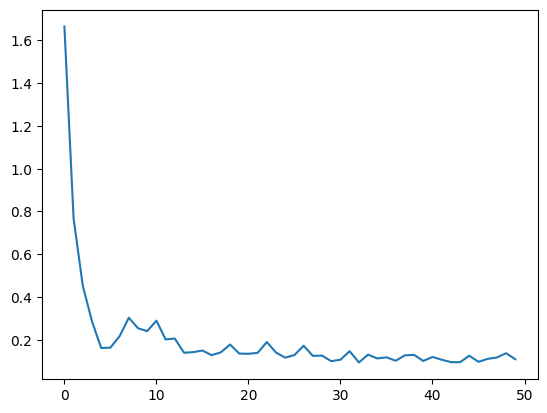

In [199]:
# Example usage
num_epochs = 50
train(model, train_loader, optimizer, loss_fn, num_epochs)

In [96]:
import pennylane as qml
import torch

# Define a quantum circuit
def create_quantum_circuit(n_qubits):
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev, interface='torch')
    def quantum_circuit(weights, features):
        # Encoding the input features into quantum states
        for i in range(n_qubits):
            qml.RY(features[i], wires=i)  # Example of encoding
        for i in range(n_qubits - 1):
            qml.CNOT(wires=[i, i + 1])
        qml.CNOT(wires=[n_qubits - 1, 0])
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    return quantum_circuit

# Example usage
num_qubits = 4
qc_weights = torch.rand((num_qubits, 3), dtype=torch.float32)  # Quantum weights
features = torch.tensor([0.1, 0.2, 0.3, 0.4], dtype=torch.float32)  # Example features
quantum_circuit = create_quantum_circuit(num_qubits)
quantum_states = quantum_circuit(qc_weights, features)
print("Quantum States:", quantum_states)


Quantum States: [tensor(0.8624, dtype=torch.float64), tensor(0.9752, dtype=torch.float64), tensor(0.9316, dtype=torch.float64), tensor(0.8581, dtype=torch.float64)]


In [97]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class QuantumGNN(nn.Module):
    def __init__(self, in_channels, out_channels, num_qubits):
        super(QuantumGNN, self).__init__()
        self.classical_gnn = GCNConv(in_channels, out_channels)
        self.num_qubits = num_qubits
        self.qc_weights = nn.Parameter(torch.rand((num_qubits, 3)))
        self.quantum_circuit = create_quantum_circuit(num_qubits)
        self.fc = nn.Linear(num_qubits, 1)  # Adjusted to match quantum features

    def forward(self, x, edge_index):
        x = self.classical_gnn(x, edge_index)
        x = F.relu(x)  # Apply non-linearity
        quantum_features = []
        for i in range(x.size(0)):
            exp_values = self.quantum_circuit(self.qc_weights, x[i])
            quantum_features.append(exp_values)
        quantum_features = torch.stack(quantum_features)
        output = self.fc(quantum_features)  # Apply linear layer to reduce to scalar
        return output.squeeze()  # Squeeze to match shape (batch_size,)

# Initialize the model and other components
model = QuantumGNN(in_channels=num_users, out_channels=1, num_qubits=4)


In [98]:
from torch.optim import Adam

# Initialize the model, loss function, and optimizer
model = QuantumGNN(in_channels=3, out_channels=1, num_qubits=4)
loss_fn = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.01)

# Training loop
n_epochs = 100
loss_list = []
acc_list = []
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = loss_fn(output, y.squeeze())  # Adjusted to match shape
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    compute_accuracy(output, data.y)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss = {loss.item()}")

# Test the model
model.eval()
with torch.no_grad():
    test_output = model(data.x, data.edge_index)
    print(f"Test output: {test_output.numpy()}")

print(loss_list)

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [200]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, Batch
from torch.utils.data import Dataset, DataLoader

# Features and target lists
features = [
    [1.35861038e-01, 4.33190739e-01, 7.23854864e-01, 6.42867499e-01],
    [1.91416628e-01, 1.48580434e-01, 6.47027568e-01, 1.01263220e-03],
    [2.45159046e-02, 2.96262195e-01, 6.98300156e-01, 4.68653316e-01],
    [2.33411211e-01, 2.29922155e-02, 6.17154253e-01, 1.43750042e-01],
    [8.65225758e-03, 8.41720551e-03, 3.08829186e-01, 6.25104117e-01],
    [4.40873582e-02, 2.64421487e-02, 1.08695066e-02, 4.57901550e-02],
    [3.19866774e-01, 5.10297757e-01, 9.29257765e-02, 5.87295451e-01],
    [7.41897341e-01, 1.31248683e-01, 3.12081251e-01, 2.50288137e-01],
    [4.09967646e-01, 1.50511004e-01, 4.50170822e-01, 1.05786690e-01],
    [3.86397857e-01, 6.25510210e-02, 3.46820337e-01, 7.14295627e-01],
    [2.66177400e-01, 3.37566163e-02, 1.20424306e-01, 2.39210475e-01],
    [1.54736225e-01, 6.90052021e-02, 9.35892197e-03, 5.34491420e-02],
    [6.64768663e-02, 1.62425087e-01, 1.55037190e-01, 5.79719592e-01],
    [4.69672779e-01, 6.14861898e-01, 1.98803658e-01, 3.16083324e-01],
    [2.45746616e-02, 4.20866923e-01, 3.67888154e-01, 7.13204372e-01],
    [7.47500791e-03, 4.19251475e-01, 1.65165851e-01, 3.23104868e-01],
    [7.08260216e-01, 2.51658375e-01, 3.47291428e-01, 1.44125377e-01],
    [1.09899477e-01, 7.43669797e-01, 5.94164336e-01, 5.44618243e-03],
    [4.30978384e-01, 4.14356521e-01, 8.73689958e-02, 6.85356162e-01],
    [5.49875014e-01, 6.78690303e-01, 4.45855492e-01, 6.23977344e-02],
    [1.60029258e-03, 1.67751263e-01, 1.47890415e-03, 3.44112058e-02],
    [3.79214904e-01, 1.36798218e-01, 7.50136150e-01, 4.75124466e-01],
    [5.38834077e-01, 2.31292394e-03, 7.21795636e-02, 2.64044006e-01],
    [4.35380841e-02, 1.48323324e-01, 4.34478324e-01, 1.45301662e-04],
    [3.79092620e-01, 2.83889346e-01, 1.49971282e-03, 2.92298183e-01],
    [2.28660230e-01, 5.69297234e-01, 1.04413484e-01, 1.54388523e-01],
    [4.48029767e-01, 6.92230495e-02, 4.27572913e-01, 2.29121364e-02],
    [7.60860831e-01, 5.48129613e-02, 2.60602063e-01, 3.20782840e-01],
    [1.73316554e-01, 7.04697576e-01, 1.79893414e-02, 1.76858613e-02],
    [2.86143876e-01, 3.78235875e-01, 1.86175243e-01, 5.63495959e-01],
    [4.30275590e-01, 6.32115768e-02, 1.63744211e-01, 6.39314908e-01],
    [5.49821185e-01, 9.11236783e-02, 2.40921350e-02, 6.78421546e-01],
    [4.23458639e-01, 5.22810436e-01, 6.55897774e-01, 6.09394086e-01],
    [7.21273458e-01, 1.98210050e-01, 1.73459385e-01, 4.47013831e-01],
    [1.56708328e-01, 6.77941139e-01, 3.73985135e-01, 2.86291146e-02],
    [1.40263078e-01, 6.34842459e-01, 6.52423171e-01, 7.24051860e-01],
    [6.00011951e-01, 7.57760539e-01, 4.01181153e-01, 2.58953903e-03],
    [4.65495303e-01, 2.84306824e-01, 1.82108315e-01, 7.20455213e-01],
    [4.16986031e-01, 3.57272350e-01, 1.60097608e-02, 1.60938646e-01],
    [3.78431385e-02, 1.81197817e-01, 6.57047199e-01, 5.49038266e-01],
    [8.66376185e-02, 5.06832558e-01, 6.78364591e-01, 1.28622118e-01],
    [4.61740020e-01, 1.72449892e-01, 1.30863621e-01, 2.27453638e-01],
    [5.82916004e-01, 3.32458404e-01, 6.00767193e-01, 1.71157223e-01],
    [2.02065680e-01, 9.02389122e-02, 4.35705316e-03, 1.87210206e-01],
    [5.25668086e-01, 3.23044162e-01, 6.93012916e-01, 2.75926565e-01],
    [1.14414801e-01, 1.82309634e-01, 2.85924760e-01, 1.36458587e-03],
    [1.35970497e-02, 9.28615619e-02, 1.97751161e-01, 6.13909185e-01],
    [6.32460551e-03, 3.05815203e-02, 3.52285785e-01, 1.41551052e-01],
    [6.67752122e-02, 6.92354492e-01, 6.76353193e-01, 5.35952242e-01],
    [7.55322633e-01, 4.89145047e-03, 3.85562966e-01, 2.22391706e-01]
]

target = [
    1.  , 0.98, 0.96, 0.94, 0.92, 0.9 , 0.88, 0.86, 0.84, 0.82,
    0.8 , 0.78, 0.76, 0.74, 0.72, 0.7 , 0.68, 0.66, 0.64, 0.62,
    0.6 , 0.58, 0.56, 0.54, 0.52, 0.5 , 0.48, 0.46, 0.44, 0.42,
    0.4 , 0.38, 0.36, 0.34, 0.32, 0.3 , 0.28, 0.26, 0.24, 0.22,
    0.2 , 0.18, 0.16, 0.14, 0.12, 0.1 , 0.08, 0.06, 0.04, 0.02
]

# Convert lists to tensors
x = torch.tensor(features, dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)


In [201]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return Data(x=self.x[idx], y=self.y[idx])

def custom_collate(batch):
    return Batch.from_data_list(batch)


In [204]:
# Define a simple GNN model
class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return x

# Initialize model, loss function, and optimizer
model = GNN(input_dim=x.shape[1], hidden_dim=64, output_dim=1)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Create CustomDataset and DataLoader
dataset = CustomDataset(x, y)
batch_size = 4  # Adjust batch size as needed
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=custom_collate)

# Training loop
def train(model, train_loader, optimizer, loss_fn, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index)
            loss = loss_fn(out, data.y.view(-1, 1))  # Assuming target is scalar (regression task)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item() * data.num_graphs
        epoch_loss /= len(train_loader.dataset)
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")

# Example usage
num_epochs = 10
train(model, train_loader, optimizer, loss_fn, num_epochs)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x16 and 4x64)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, Batch
from torch.utils.data import DataLoader, Subset
import qiskit
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual dataset)
features = [
    [1.35861038e-01, 4.33190739e-01, 7.23854864e-01, 6.42867499e-01],
    [1.91416628e-01, 1.48580434e-01, 6.47027568e-01, 1.01263220e-03],
    # ... (add more data here)
]
target = [
    1.0, 0.98, 0.96, 0.94,
    # ... (add more targets here)
]
num_nodes = len(features)
edge_index = torch.combinations(torch.arange(num_nodes)).t().contiguous()

# Convert features and target to torch tensors
x = torch.tensor(features, dtype=torch.float)
y = torch.tensor(target, dtype=torch.float)

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Define the size of the validation set (e.g., 20%)
val_size = int(0.2 * len(data))

# Create indices for train and validation sets
indices = list(range(len(data)))
train_indices = indices[val_size:]
val_indices = indices[:val_size]

# Create Subset objects from the Data object
train_data = Subset(data, train_indices)
val_data = Subset(data, val_indices)

# Custom collate function for DataLoader
def custom_collate(batch):
    return Batch.from_data_list(batch)

# Create DataLoader
batch_size = 5  # Adjust batch size as needed
train_loader = DataLoader([data], batch_size=batch_size, shuffle=True, collate_fn=custom_collate)
val_loader = DataLoader([val_data], batch_size=batch_size, shuffle=False, collate_fn=custom_collate)

# Define a simple Quantum Circuit using Qiskit
def create_quantum_circuit(num_qubits):
    qc = QuantumCircuit(num_qubits)
    params = [Parameter(f'θ{i}') for i in range(num_qubits)]
    for i, param in enumerate(params):
        qc.ry(param, i)
    qc.measure_all()
    return qc, params

def quantum_forward(qc, params, input_features):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc.bind_parameters({param: input_features[i] for i, param in enumerate(params)}), backend)
    result = job.result()
    counts = result.get_counts()
    return counts

# Define the Quantum GNN model
class QuantumGNN(torch.nn.Module):
    def __init__(self, num_nodes, num_features, num_qubits):
        super(QuantumGNN, self).__init__()
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, 4)
        self.qc, self.params = create_quantum_circuit(num_qubits)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        # Convert to numpy array and prepare for quantum circuit
        x_np = x.detach().numpy()
        qc_outputs = []
        for feature in x_np:
            qc_output = quantum_forward(self.qc, self.params, feature)
            qc_outputs.append(qc_output)
        qc_outputs = torch.tensor(qc_outputs, dtype=torch.float)
        return qc_outputs

# Create a Quantum GNN model instance
num_qubits = 4
model = QuantumGNN(num_nodes=num_nodes, num_features=4, num_qubits=num_qubits)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Define training function
def train(model, train_loader, optimizer, criterion, num_epochs):
    model.train()
    loss_list = []
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for data in train_loader:
            optimizer.zero_grad()
            out = model(data.x, data.edge_index)
            loss = criterion(out.squeeze(), data.y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        epoch_loss /= len(train_loader.dataset)
        loss_list.append(epoch_loss)
        print(f"Epoch {epoch + 1}, Loss: {epoch_loss:.4f}")
    plt.plot(range(num_epochs), loss_list)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# Training the model
num_epochs = 100
train(model, train_loader, optimizer, criterion, num_epochs)

# Evaluation function
def compute_regression_metrics(pred, target):
    mse = np.mean((pred - target) ** 2)
    mae = np.mean(np.abs(pred - target))
    return mse, mae

def evaluate_regression_model(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    total_mse = 0.0
    total_mae = 0.0
    total_samples = 0
    with torch.no_grad():
        for data in data_loader:
            out = model(data.x, data.edge_index)  # Forward pass
            pred = out.view(-1).cpu().numpy()  # Flatten predictions
            target = data.y.view(-1).cpu().numpy()  # Flatten true labels
            mse, mae = compute_regression_metrics(pred, target)
            total_mse += mse * len(data.y)
            total_mae += mae * len(data.y)
            total_samples += len(data.y)
    mean_mse = total_mse / total_samples
    mean_mae = total_mae / total_samples
    return mean_mse, mean_mae

# Evaluate the model
mse, mae = evaluate_regression_model(model, val_loader)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")


ModuleNotFoundError: No module named 'torch'